# 1장
- 변수 = 별도의 장소에 있는 실체를 가리키는 포인터
    - 물건에 부탁되어 있는 태그
- 딥러닝에서의 예측 알고리즘 = **막대한 파라미터를 가진 복잡한 합성 함수**
- 합성 함수
    - f1의 출력인 x1이 그대로 다음 함수 f2의 입력값이 되고, f2의 출력 x2도 그대로 f3으로 입력된다.

수학적인 관점에서 딥러닝 알고리즘은 합성 함수와 미분으로 이뤄졌다.

- 딥러닝 학습 알고리즘은 **손실**의 계산 결과를 이용해 최적의 파라미터 값을 구한다.

## 객체 지향의 기초 개념
- 객체와 오브젝트는 동의어다.
- **클래스**와 **인스턴스**
- 클래스 = '틀'
    - 클래스 안의 변수 = 속성
- 인스턴스 = 클래스(틀)로부터 생성된 개별적 실체
    - 속성으로 불리는 클래스 안의 변숫값은, 인스턴스마다 다르다.
- 함수 = 메서드(method)
  - 처리 기능

In [3]:
# 그래프 출력을 위한 라이브러리
import matplotlib.pyplot as plt
# 원을 그리는 데 필요한 라이브러리
import matplotlib.patches as patches

# Point 클래스 정의
class Point:
    # 인스턴스 생성 시에 두 개의 인수 x와 y를 가짐
    def __init__(self, x, y):
        # 인스턴스 속성 x에 첫 번째 인수를 할당
        self.x = x
        # 인스턴스 속성 y에 두 번째 인수를 할당
        self.y = y
    
    # draw 함수 정의(인수 없음)
    def draw(self):
        # (x, y)에 점을 그림
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

- \__init\__ 함수: 초기화 처리를 위해 반드시 호출되는 함수
    - \__init\__ 함수의 첫 번째 인수, self 변수: 클래스로부터 인스턴스를 생성 할 때, 인스턴스 자신을 가리킨다.
    - self.x = x: 인스턴스의 속성 x(=self.x)에 \__init\__ 함수의 파라미터로 값 x를 대입한다는 의미다.

#### 인스턴스 생성하기

In [4]:
p1 = Point(2, 3)
p2 = Point(-1, -2)

##### 인스턴스 속성으로 접근

In [5]:
# p1과 p2의 속성 x, y
print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


## 클래스의 상속
- Circle 클래스에 반경을 의미하는 속성 r을 추가해보자.
  - Point 클래스의 자식 클래스

In [6]:
class Circle1(Point):
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r

- 다른 클래스의 이름이 인수가 된다 => 클래스의 상속을 의미
  - **Circle1 클래스가 Point 클래스의 자식 클래스로 정의된다**
  - super().\__init\__(x, y): Point 클래스의 \__init__ 함수 호출
    - 자식 클래스만 가지고 있는 

### 오버라이드

In [8]:
class Circle2(Point):
    def __init__(self, x, y, r):
        super().__init__(x, y)
        self.r = r
    
    # 원을 그리는 함수로 재정의(Circle2 클래스에서만)
    def draw(self):
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

- 부모 클래스와(Point) 같은 이름의 함수(draw)를 자식 클래스(Circle2)에서 역할을 달리 정의하는 것을 **오버라이드**라고 부른다.

### 부모 클래스의 메서드 호출

In [9]:
class Circle3(Point):
    def __init__(self, x, y, r):
        super().__init__(x, y)
        self.r = r
    # Circle의 draw 함수는 부모의 함수를 호출한 다음, 원 그리기를 독자적으로 수행함
    def draw(self):
        # 부모 클래스의 draw 함수 호출
        super().draw()
        
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

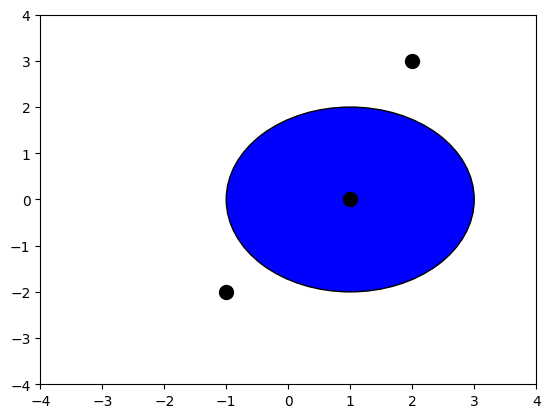

In [10]:
# Circle3 클래스로부터 인스턴스 변수 c3 생성
c3 = Circle3(1, 0, 2)

# p1, p2, c3의 각 draw 함수 호출
ax = plt.subplot()
p1.draw()
p2.draw()
c3.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()


- 원의 중심에 해당하는 좌표(1,0)에 점이 표시되고, 원도 함께 그려진다.

## 인스턴스를 함수로 사용하는 방법
- **클래스에서 생성한 인스턴스를 호출 가능한 함수로 만드는 방법**
- 클래스 정의 안에서 \__call\__ 함수 정의

In [13]:
import numpy as np
# 호출 가능한 클래스 H의 정의와 인스턴스 생성
class H:
    def __call__(self, x):
        return 2*x**2 + 2

#### h가 함수로 동작하는지 확인

# np 배열 x 정의
x = np.arange(-2, 2.1, 0.25)
print(x)

# H 클래스의 인스턴스로 h를 생성
h = H()

# 함수 h 호출
y = h(x)
print(y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


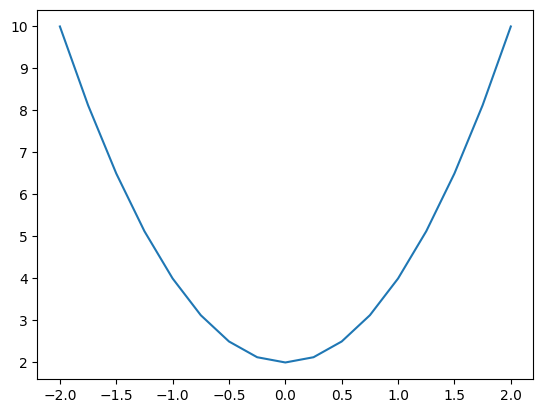

In [14]:
# 그래프 출력
plt.plot(x, y)
plt.show()

**클래스로 생성한 인스턴스를 함수로 사용하는** 테크닉은 파이토치의 여러 부분에서 자주 등장하므로, 파이토치를 제대로 다루기 위한 <u>필수 지식</u> 중 하나다.